# Importing libraies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype
from matplotlib import style
style.use('ggplot')

# Uploading file

In [2]:
from google.colab import files

uploaded = files.upload() # Here we will upload the csv files for this problem

for fn in uploaded.keys():
 print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 99acres.csv to 99acres.csv
You uploaded file "99acres.csv" with length 13874084 bytes


# Loading and Viewing Data

In [3]:
df1 = pd.read_csv('99acres.csv', header=None, skiprows=[0])

In [4]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,https://mediacdn.99acres.com/media1/14610/9/29...,1,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment in Chembur,Thapar Suburbia,https://www.99acres.com/thapar-suburbia-chembu...,₹ 1.87 - 1.94,Cr,"₹ 26,532/sq.ft.",706-726,sq.ft.,(66-67 sq.m.) Carpet Area,2 BHK,2 Baths,Thapar Suburbia is an under construction proje...,more,FEATURED,UNDER CONSTRUCTION,NEW BOOKING,RERA,Share Feedback,Hide,Shortlist,Builder,"Posted on 01st Apr, 2021 by",Thapar Realtors,View Phone Number,Contact Builder,NaN,NaN,NaN,NaN,NaN
1,https://mediacdn.99acres.com/media1/14938/16/2...,2,https://www.99acres.com/3-bhk-bedroom-resident...,3 BHK Residential Apartment in Hiranandani Gar...,Hiranandani Octavius,https://www.99acres.com/hiranandani-octavius-h...,₹ 5.5,Cr,"₹ 35,483/sq.ft.","1,550",sq.ft.,(144 sq.m.) Super built-up Area,3 BHK,3 Baths,Newly renovated fully done up 3 bhk flat avail...,NaN,FEATURED,READY TO MOVE,RESALE,NaN,Share Feedback,Hide,Shortlist,RERA Registered Dealer,"Posted on 28th May, 2021 by",City Concepts Realty,View Phone Number,Contact Dealer,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Learn more,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View verified properties,NaN,NaN,NaN,NaN,NaN,NaN
3,https://mediacdn.99acres.com/media1/13897/19/2...,1,https://www.99acres.com/3-bhk-bedroom-resident...,3 BHK Residential Apartment in Pokhran-2,Courtyard Rozanne,https://www.99acres.com/courtyard-rozanne-pokh...,₹ 3.12,Cr,"₹ 24,605/sq.ft.","1,268",sq.ft.,(118 sq.m.) Carpet Area,3 BHK,NaN,Make Courtyard Rozanne your next home. Book yo...,more,UNDER CONSTRUCTION,NEW BOOKING,RERA,NaN,Share Feedback,Hide,Shortlist,Builder,"Posted on 30th Jan, 2021 by",Courtyard Real Estate PVT Ltd,View Phone Number,Contact Builder,NaN,NaN,NaN,NaN,NaN
4,NaN,Possession from Dec 2026,NaN,NaN,Purva Clermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Number of rows are {}, and number of columns are {}".format(df1.shape[0],df1.shape[1]))

Number of rows are 15360, and number of columns are 33


# Preprocessing data

## Droping columns which are not useful

In [6]:
# We will check each and every column one by one to find out weather it has useful data or not after  that we will create list of columns that are useful
#df1[32].head(10)

In [7]:
useful_col = [3, 6, 7, 9, 10, 11, 12, 13, 16, 17]

In [8]:
df2 = df1.iloc[:,useful_col]

## Droping rows which do not have housing details

In [9]:
df3 = df2[~df2[3].isnull()]

## Processing last 2 columns

In [10]:
# Taking useful data from col 17 and saving it in 16
for i in range(len(df3)):
  if(df3.iloc[i,8]=='FEATURED'):
    df3.iloc[i,8]=df3.iloc[i,9]

<ipython-input-10-7fb64625ab40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.iloc[i,8]=df3.iloc[i,9]


## Checking if apartment is residential or not

In [11]:
df4 = df3[df3[3].str.contains('Residential Apartment')]

## Generating processed columns

### Creating Location column

In [12]:
df4['Location'] = None
for i in range(len(df4)):
  pattern = 'Residential Apartment in '
  result = re.finditer(pattern, df4.iloc[i,0])
  end_index = [r.end() for r in result][0]
  df4.iloc[i,10] =  df4.iloc[i,0][end_index:]

<ipython-input-12-52e76ea4fb47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Location'] = None


### Creating Price column

In [13]:
df4['Price (Lac)'] = None
for i in range(len(df4)):

  price = re.findall('\d*\.?\d+',df4.iloc[i,1])

  try:
    if(len(price)==2):
      if(df4.iloc[i,4]=='sq.ft.'):
        price = (float(price[0])+float(price[1]))/2
      elif(df4.iloc[i,4]=='Cr'):
        price = (float(price[0])+float(price[1])*100)/2
    else:
      price = float(price[0])
    price = round(price,2)

    if(df4.iloc[i,2]=='Cr'):
      df4.iloc[i,11] = price*100
    else:
      df4.iloc[i,11] = price
  except:
    df4.iloc[i,11] = None


<ipython-input-13-d728edcf78c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Price (Lac)'] = None


In [14]:
df4.head()

,3,6,7,9,10,11,12,13,16,17,Location,Price (Lac)
0,2 BHK Residential Apartment in Chembur,₹ 1.87 - 1.94,Cr,706-726,sq.ft.,(66-67 sq.m.) Carpet Area,2 BHK,2 Baths,UNDER CONSTRUCTION,UNDER CONSTRUCTION,Chembur,191.00
1,3 BHK Residential Apartment in Hiranandani Gar...,₹ 5.5,Cr,"1,550",sq.ft.,(144 sq.m.) Super built-up Area,3 BHK,3 Baths,READY TO MOVE,READY TO MOVE,Hiranandani Gardens - Powai,550.00
3,3 BHK Residential Apartment in Pokhran-2,₹ 3.12,Cr,"1,268",sq.ft.,(118 sq.m.) Carpet Area,3 BHK,NaN,UNDER CONSTRUCTION,NEW BOOKING,Pokhran-2,312.00
5,1 BHK Residential Apartment in Vikhroli (East),₹ 71 - 76,Lac,384-411,sq.ft.,1 Bath,1 BHK,NaN,UNDER CONSTRUCTION,NEW LAUNCH,Vikhroli (East),73.50
6,2 BHK Residential Apartment in Vikhroli (East),₹ 97 - 99,Lac,498-509,sq.ft.,2 Baths,2 BHK,NaN,UNDER CONSTRUCTION,NEW LAUNCH,Vikhroli (East),98.00


In [15]:
df4 = df4[~df4['Price (Lac)'].isnull()]

### Creating Area column

In [16]:
df4['Area (sq.ft)'] = None
for i in range(len(df4)):
  area = re.findall('\d*\.?\d+',df4.iloc[i,3].replace(',',''))
  try:
    if(len(area)==2):
      area = (float(area[0])+float(area[1]))/2
    else:
      area = float(area[0])
    area = round(area,2)
    df4.iloc[i,12] = area

  except:
    df4.iloc[i,12] = None


<ipython-input-16-34fc0ed2ee5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Area (sq.ft)'] = None


### Creating BHK column

In [17]:
df4['BHK'] = None
for i in range(len(df4)):
  try:
    bhk = int(re.findall('\d*\.?\d+',df4.iloc[i,6])[0])
    df4.iloc[i,13] = bhk
  except:
    df4.iloc[i,13] = None

In [18]:
df4 = df4[~df4[ 'BHK'].isnull()]

### Creating Bathrooms column

In [19]:
df4['Bathrooms'] = None
for i in range(len(df4)):
  try:
    if(pd.isnull(df4.iloc[i,7]) & ('Bath' in df4.iloc[i,5])):
      bath = int(re.findall('\d*\.?\d+',df4.iloc[i,5])[0])
      df4.iloc[i,14] = bath
    elif(~pd.isnull(df4.iloc[i,7])):
      bath = int(re.findall('\d*\.?\d+',df4.iloc[i,7])[0])
      df4.iloc[i,14] = bath
  except:
    df4.iloc[i,14] = None

<ipython-input-19-027b9168203b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Bathrooms'] = None


In [20]:
# Filling nan values in bathrooms column
for i in range(len(df4)):
  if(pd.isnull(df4.iloc[i,14])):
    df4.iloc[i,14]=df4.iloc[i,13]

### Creating Status column

In [21]:
df4['Status'] = df4[16]

## Removing useless columns

In [22]:
df5 = df4.drop([3,6,7,9,10,11,12,13,16,17], axis=1)

## Analyzing Location column

In [23]:
df5['Location'] = df5['Location'].apply(lambda x: x.strip())
location_count = df5.groupby('Location')['Location'].agg('count')

In [24]:
print('There are {} unique locations'.format(len(location_count)))

There are 2158 unique locations


In [25]:
print('There are {} unique locations with value count of greater than 10'.format(len(location_count[location_count>10])))

There are 215 unique locations with value count of greater than 10


In [26]:
# We will name all locations with value count less than or equal to 10 as other
location_count_10 = location_count[location_count<=10]
df5['Location'] = df5['Location'].apply(lambda x: 'other' if x in location_count_10 else x)

## Changing dtypes of columns

In [27]:
df5['Price (Lac)'] = df5['Price (Lac)'].apply(pd.to_numeric)
df5['Area (sq.ft)'] = df5['Area (sq.ft)'].apply(pd.to_numeric)
df5['BHK'] = df5['BHK'].apply(pd.to_numeric)
df5['Bathrooms'] = df5['Bathrooms'].apply(pd.to_numeric)

## Outlier detection

In [28]:
df5.describe()

,Price (Lac),Area (sq.ft),BHK,Bathrooms
count,13660.00,13660.00,13660.00,13660.00
mean,147.98,932.48,1.83,1.89
std,227.62,4848.39,0.87,0.86
min,5.50,1.00,1.00,1.00
25%,45.00,560.00,1.00,1.00
50%,86.00,710.00,2.00,2.00
75%,167.00,1050.00,2.00,2.00
max,7000.00,559723.00,8.00,8.00


### Bathroom outliers with respect to BHK

In [29]:
# Removing rows where number of bathrooms are more than 2 + BHK (from domain knowledge)
df5 = df5[~(df5['Bathrooms']>2+df5['BHK'])]

### Area per BHK outliers

In [30]:
# Removing rows where area per bhk is less than 300 (from domain knowledge)
df5 = df5[~(df5['Area (sq.ft)']/df5['BHK']<300)]

### Price per sq.ft outliers

In [31]:
# Creating feature to check price outliers
df5['Price per sq.ft (₹)'] = 100000*df5['Price (Lac)']/df5['Area (sq.ft)']

In [32]:
# Checking stats of Price per sq.ft
df5['Price per sq.ft (₹)'].describe()

count    12651.00
mean     14795.95
std      12418.41
min          3.75
25%       6476.19
50%      11000.00
75%      20147.83
max     380000.00
Name: Price per sq.ft (₹), dtype: float64

In [33]:
price_range = (3000,40000) # Decided after research
df5 = df5[(df5['Price per sq.ft (₹)']<price_range[1]) & (df5['Price per sq.ft (₹)']>price_range[0])]

### Price outliers

In [34]:
df5['Price (Lac)'].describe()

count   12003.00
mean      126.17
std       142.03
min        11.00
25%        44.00
50%        84.00
75%       160.00
max      3650.00
Name: Price (Lac), dtype: float64

In [35]:
max_price = 1200
df5 = df5[~(df5['Price (Lac)']>max_price)]

### Area outliers

In [36]:
df5['Area (sq.ft)'].describe()

count   11988.00
mean      874.04
std       496.44
min       300.00
25%       580.00
50%       720.00
75%      1059.62
max     15758.00
Name: Area (sq.ft), dtype: float64

In [37]:
df6 = df5[~(df5['Area (sq.ft)']>6000)]

Now data is ready for visualization

# Visualization

## Plotting columns independently

### Bar chart of Location

In [38]:
# Genrating list of locations with value counts greater than 100
location_count = df6.groupby('Location')['Location'].agg('count')
location_count_100 = location_count[location_count>100].drop('other')

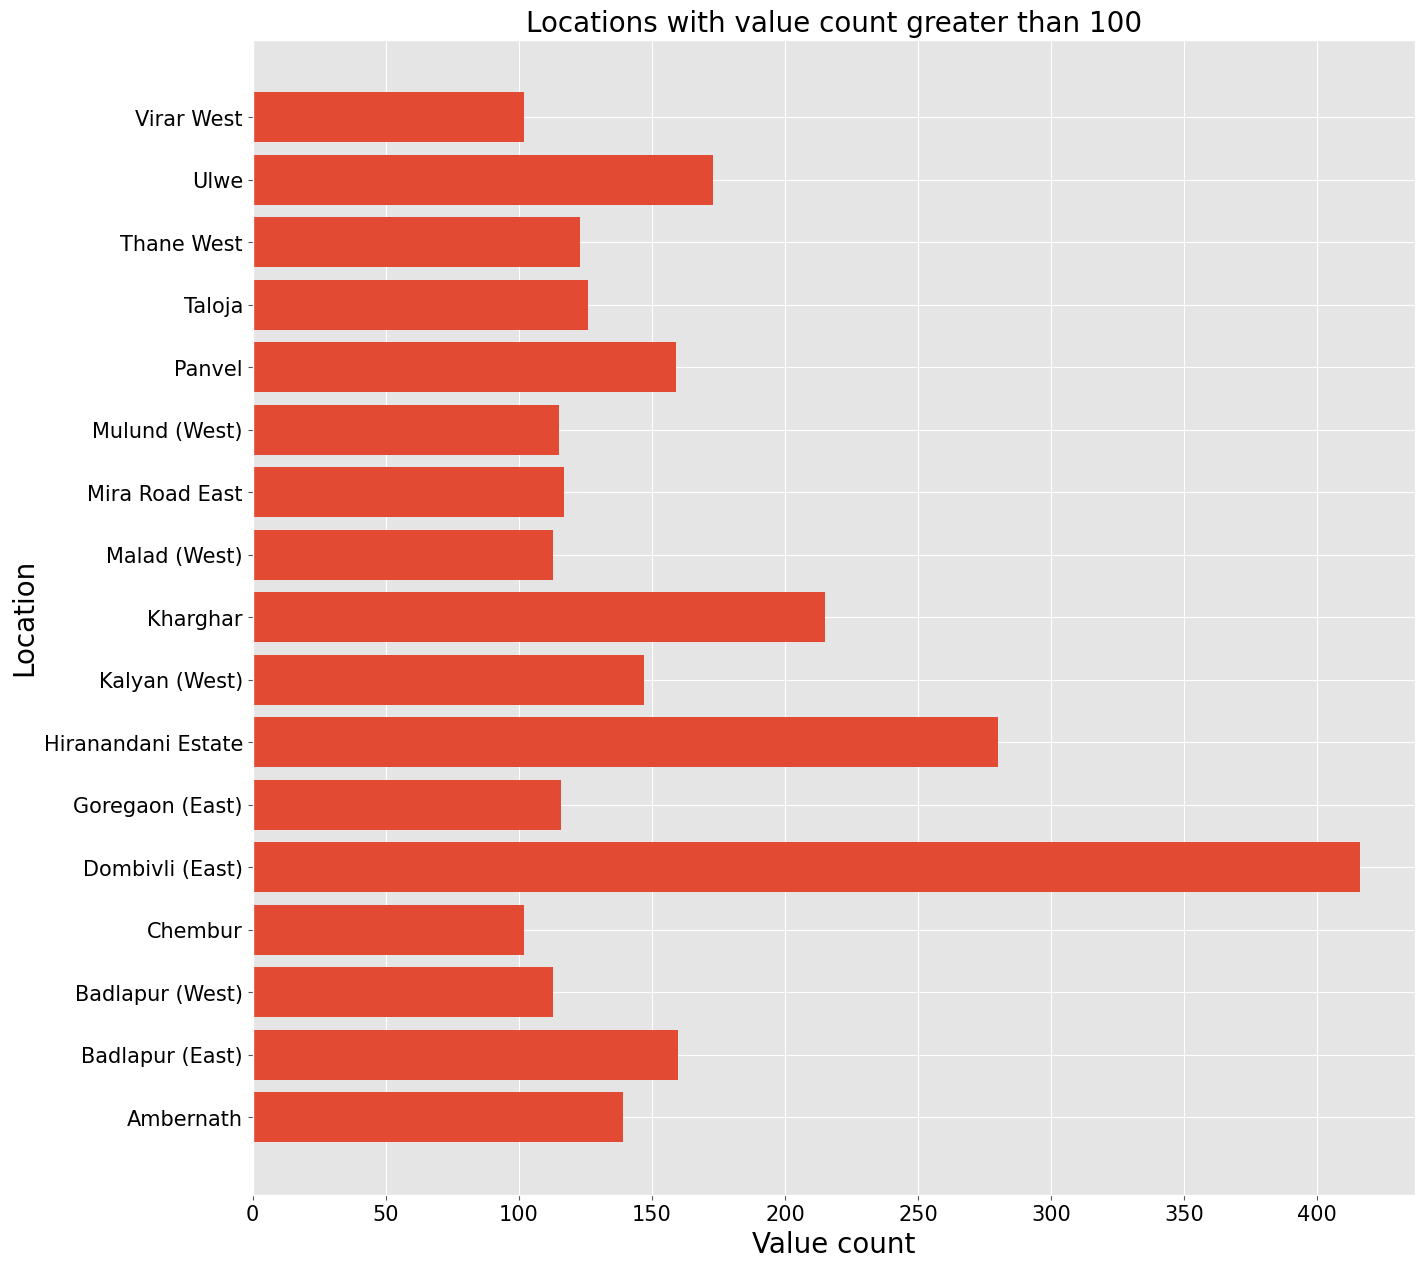

In [39]:
plt.figure(figsize=(15,15))
plt.barh(location_count_100.index,location_count_100.values)
plt.title('Locations with value count greater than 100',color = 'black', fontsize=20)
plt.xticks(color = 'black', fontsize=15)
plt.yticks(color = 'black', fontsize=15)
plt.xlabel('Value count',color = 'black', fontsize=20)
plt.ylabel('Location',color = 'black', fontsize=20)
plt.show()

### Bar chart of Status

In [40]:
status = df6.groupby('Status')['Status'].agg('count')

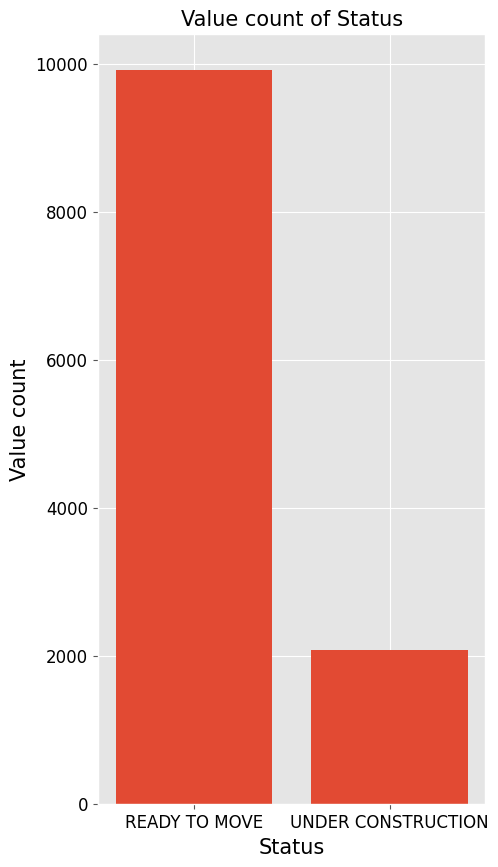

In [41]:
plt.figure(figsize=(5,10))
plt.bar(status.index,status.values)
plt.title('Value count of Status',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Status',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Bar chart of BHK

In [42]:
bhk = df6.groupby('BHK')['BHK'].agg('count')

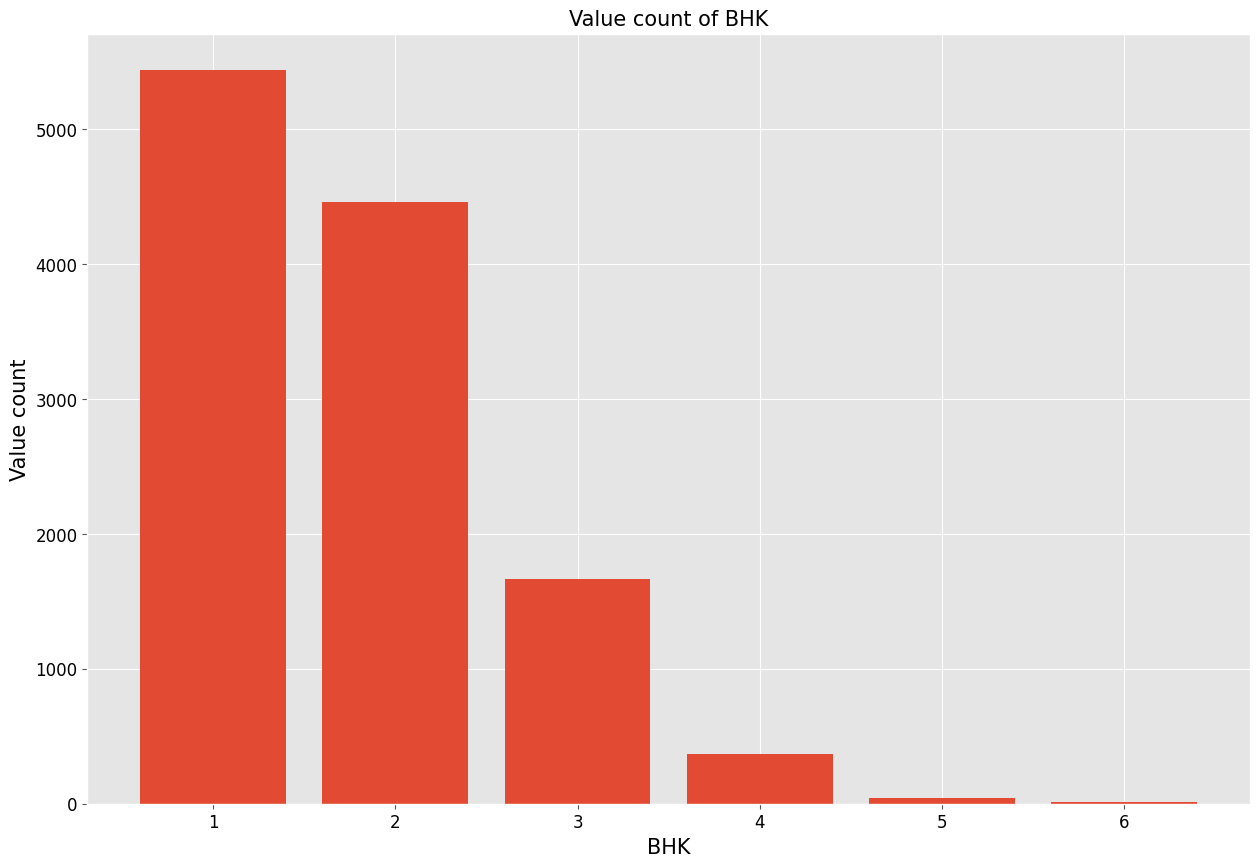

In [43]:
plt.figure(figsize=(15,10))
plt.bar(bhk.index,bhk.values)
plt.title('Value count of BHK',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('BHK',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Bar chart of Bathrooms

In [44]:
bath = df6.groupby('Bathrooms')['Bathrooms'].agg('count')

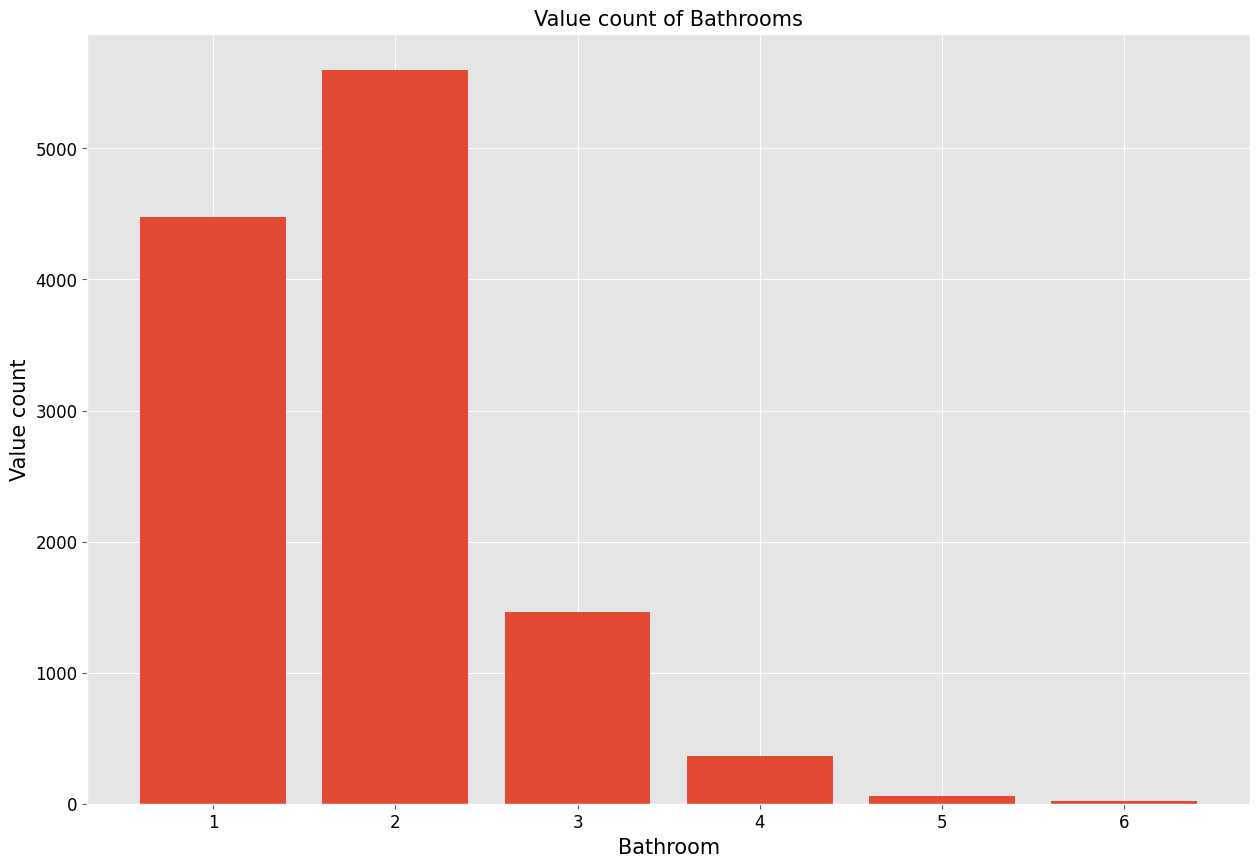

In [45]:
plt.figure(figsize=(15,10))
plt.bar(bath.index,bath.values)
plt.title('Value count of Bathrooms',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Bathroom',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Area

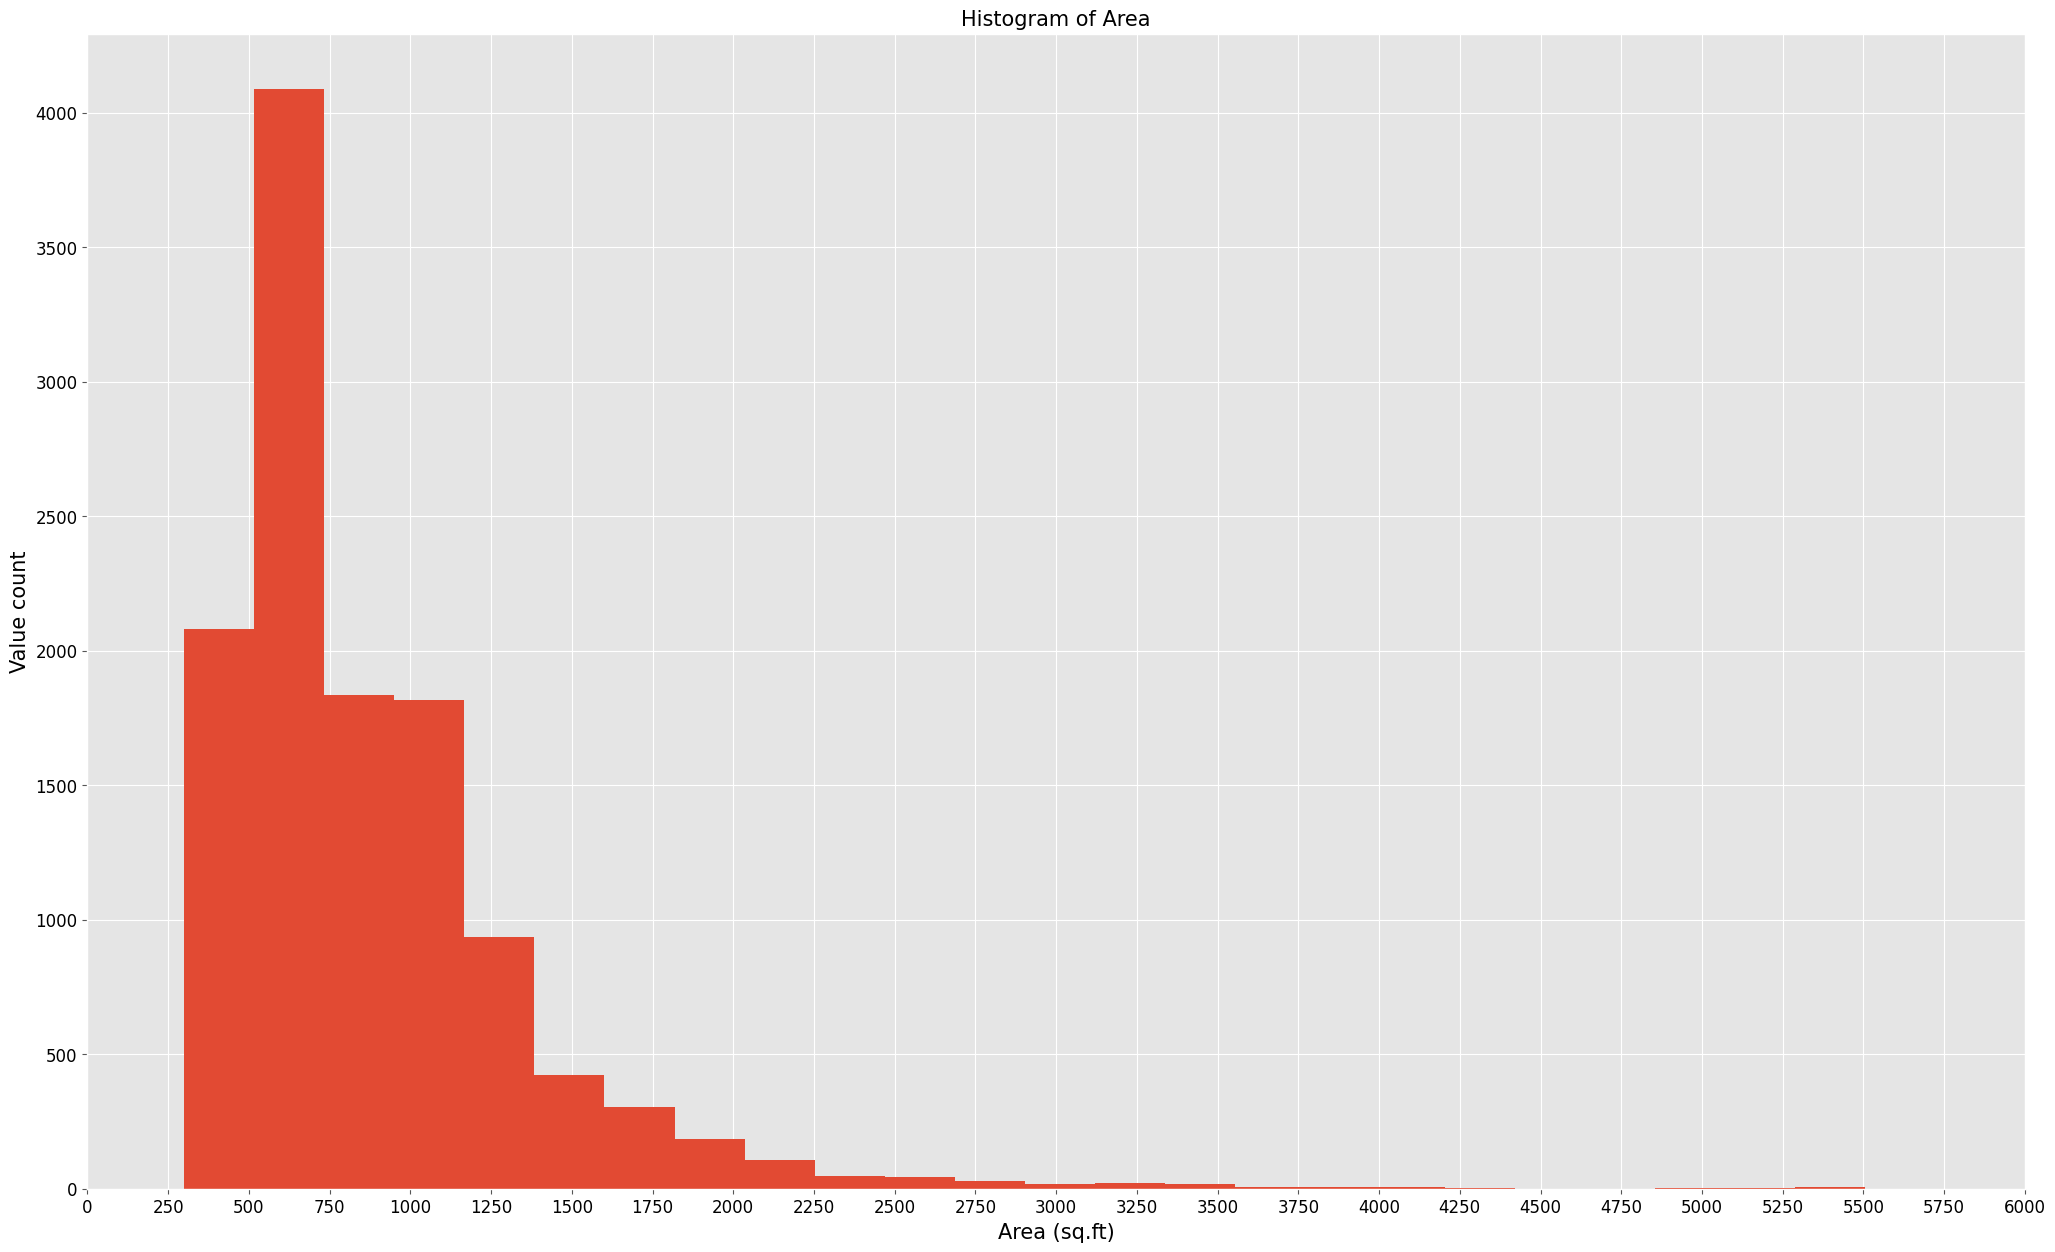

In [46]:
plt.figure(figsize=(25,15))
plt.hist(df6['Area (sq.ft)'],24)
plt.title('Histogram of Area',color = 'black', fontsize=15)
plt.xticks(range(0,6250,250), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Area (sq.ft)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Price

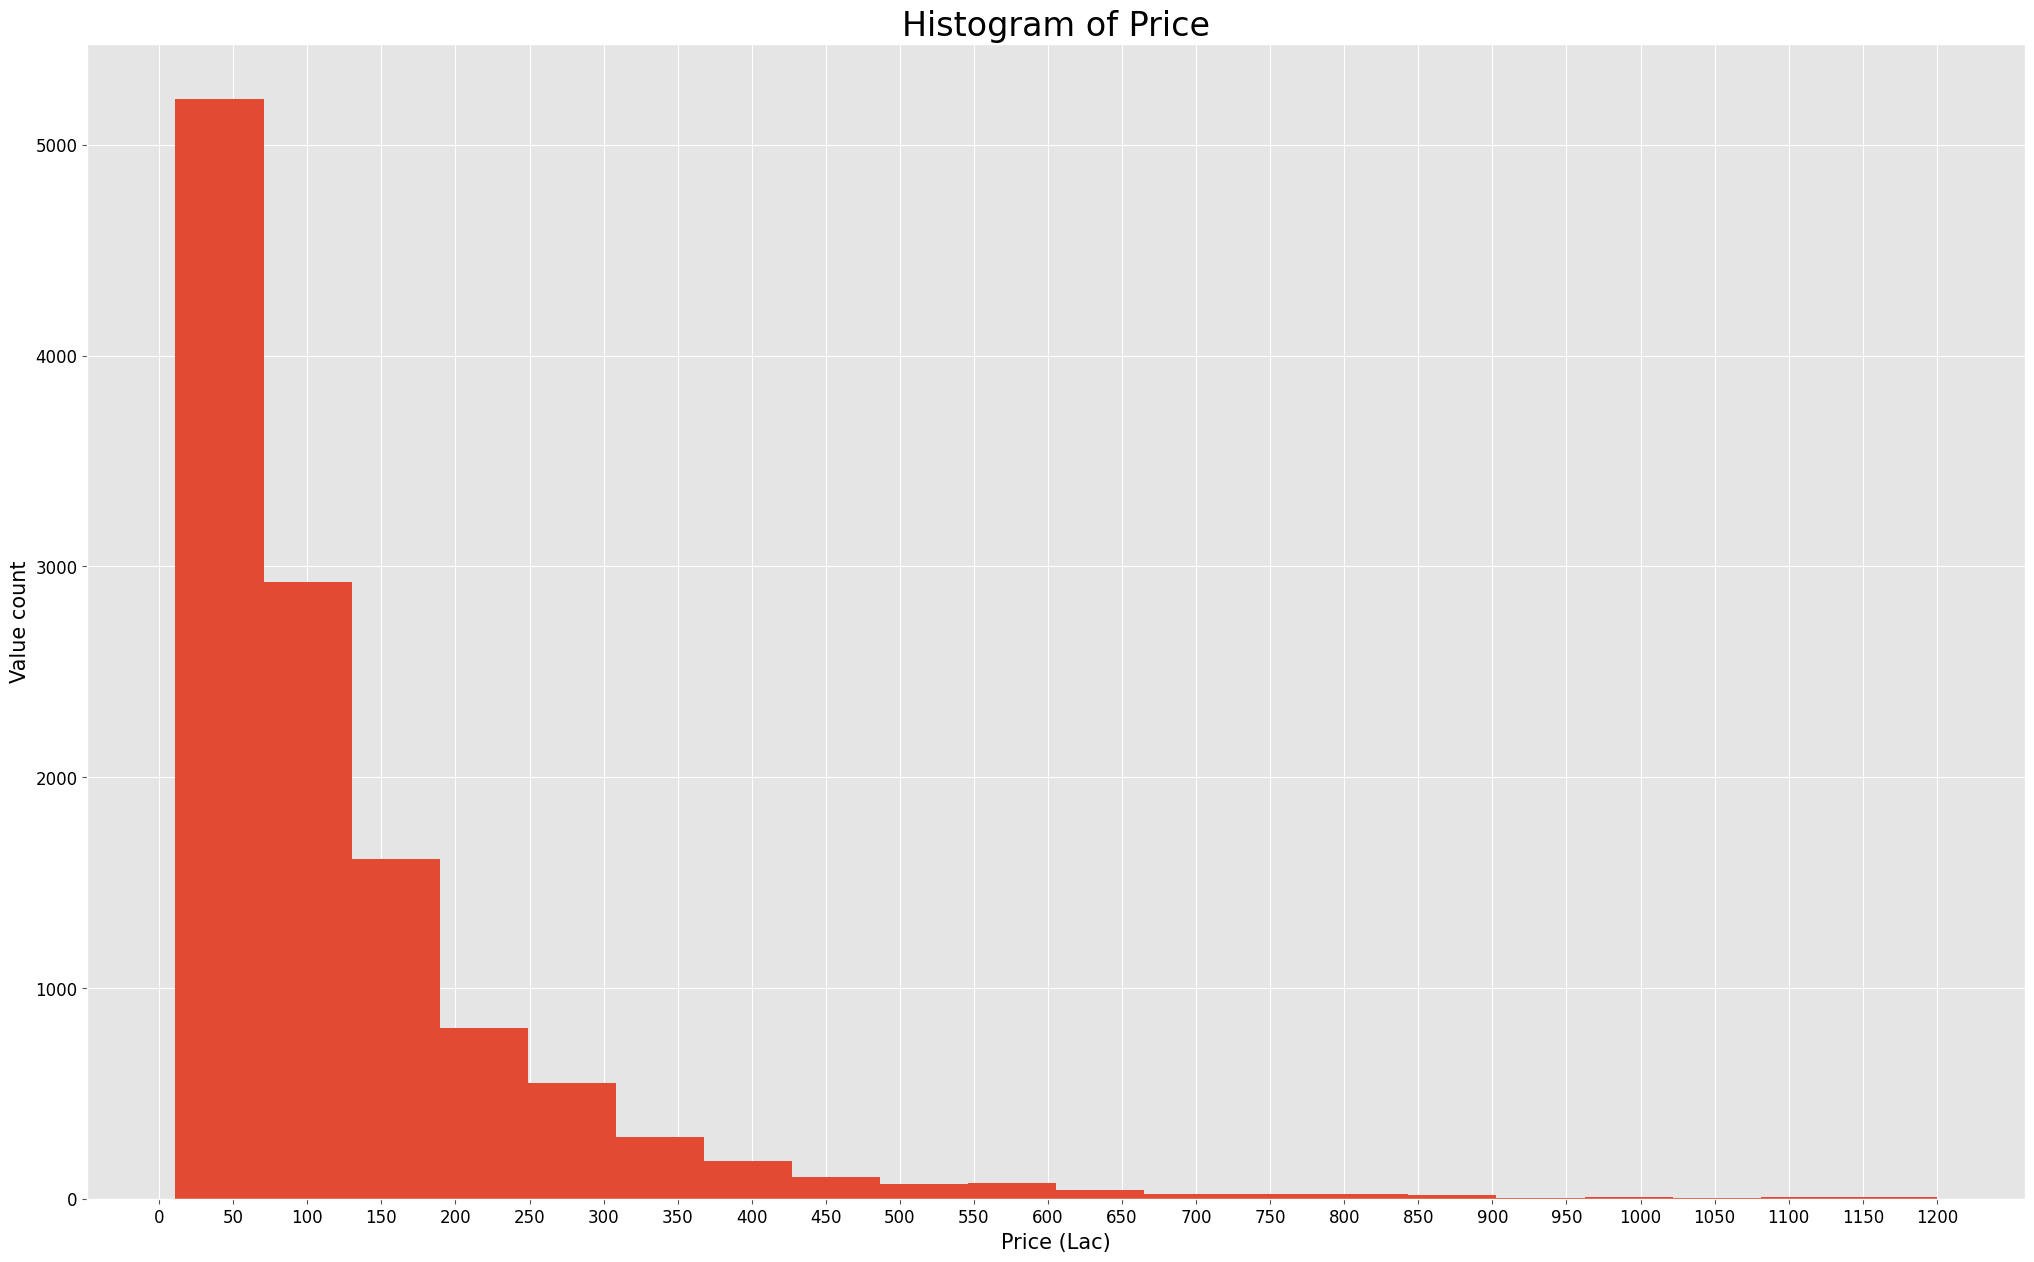

In [47]:
plt.figure(figsize=(25,15))
plt.hist(df6['Price (Lac)'],20)
plt.title('Histogram of Price',color = 'black', fontsize=24)
plt.xticks(range(0,1250,50), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Price (Lac)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Price per sq.ft  

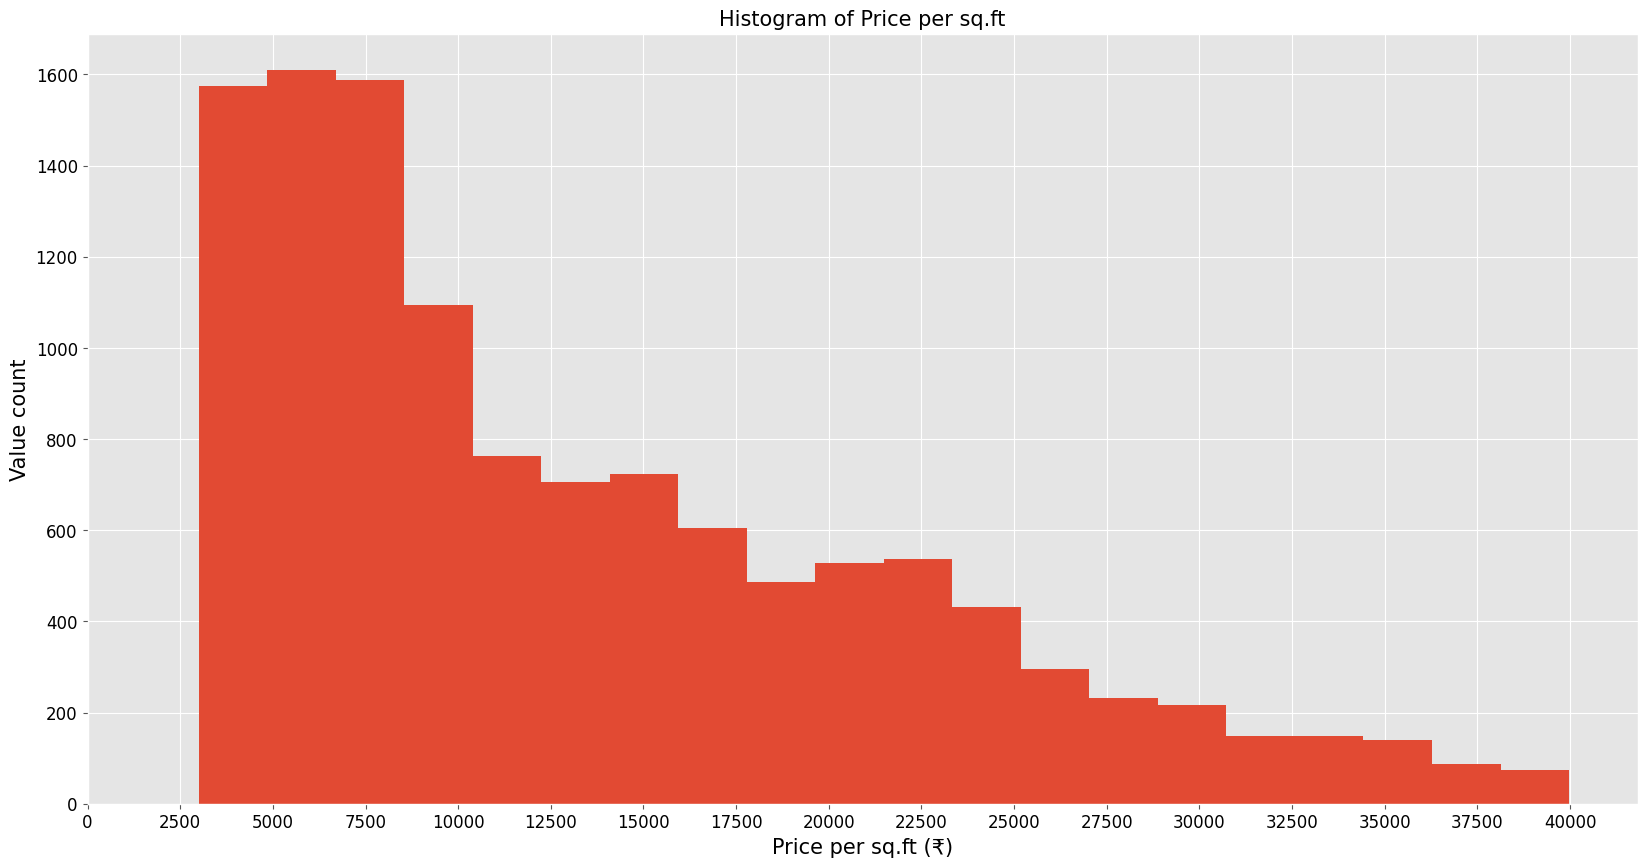

In [48]:
plt.figure(figsize=(20,10))
plt.hist(df6['Price per sq.ft (₹)'],20)
plt.title('Histogram of Price per sq.ft',color = 'black', fontsize=15)
plt.xticks(range(0,42500,2500), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Price per sq.ft (₹)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

## Scatter plots with price

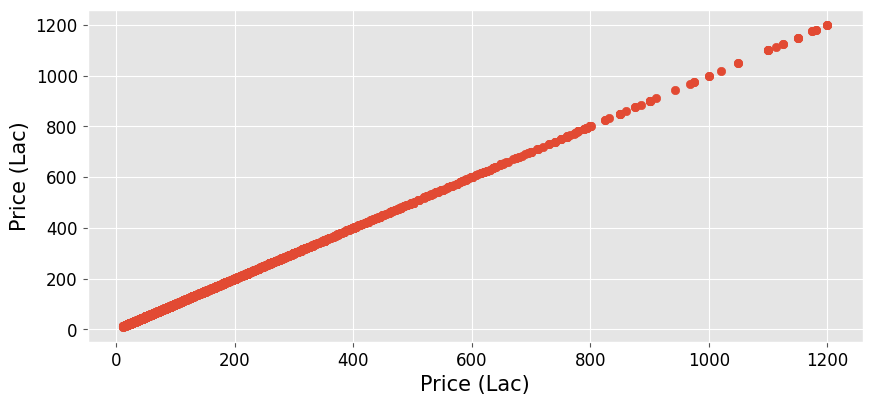

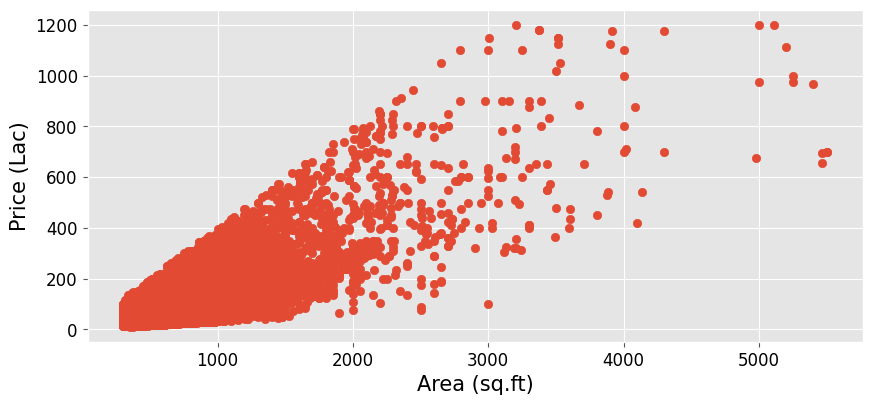

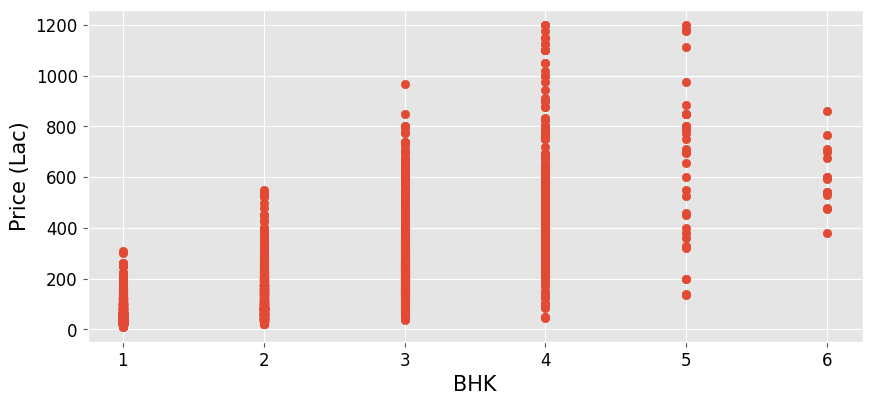

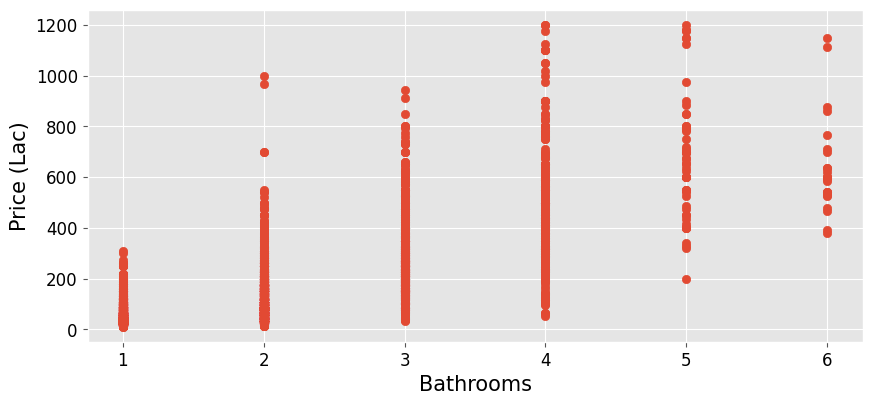

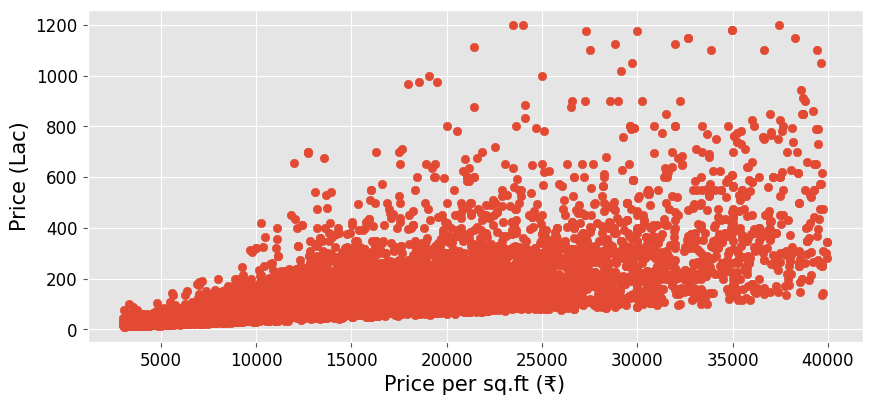

In [49]:
iter = 1
for col in df6.columns.values:
  if(is_numeric_dtype(df6[col])):
    plt.figure(figsize=(10,25))
    plt.subplot(5,1,iter)
    plt.scatter(df6[col],df6['Price (Lac)'])
    plt.xticks(color = 'black', fontsize=12)
    plt.yticks(color = 'black', fontsize=12)
    plt.xlabel(col,color = 'black', fontsize=15)
    plt.ylabel('Price (Lac)',color = 'black', fontsize=15)
    plt.show()
    iter+=1


Observations


*   All features are positively correlated with Price




## Bar chart of Locations representing price

In [50]:
location_prices = df6.groupby('Location').mean()['Price (Lac)']
location_price_300 = location_prices[location_prices>300]

<ipython-input-50-4a42d9175749>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location_prices = df6.groupby('Location').mean()['Price (Lac)']


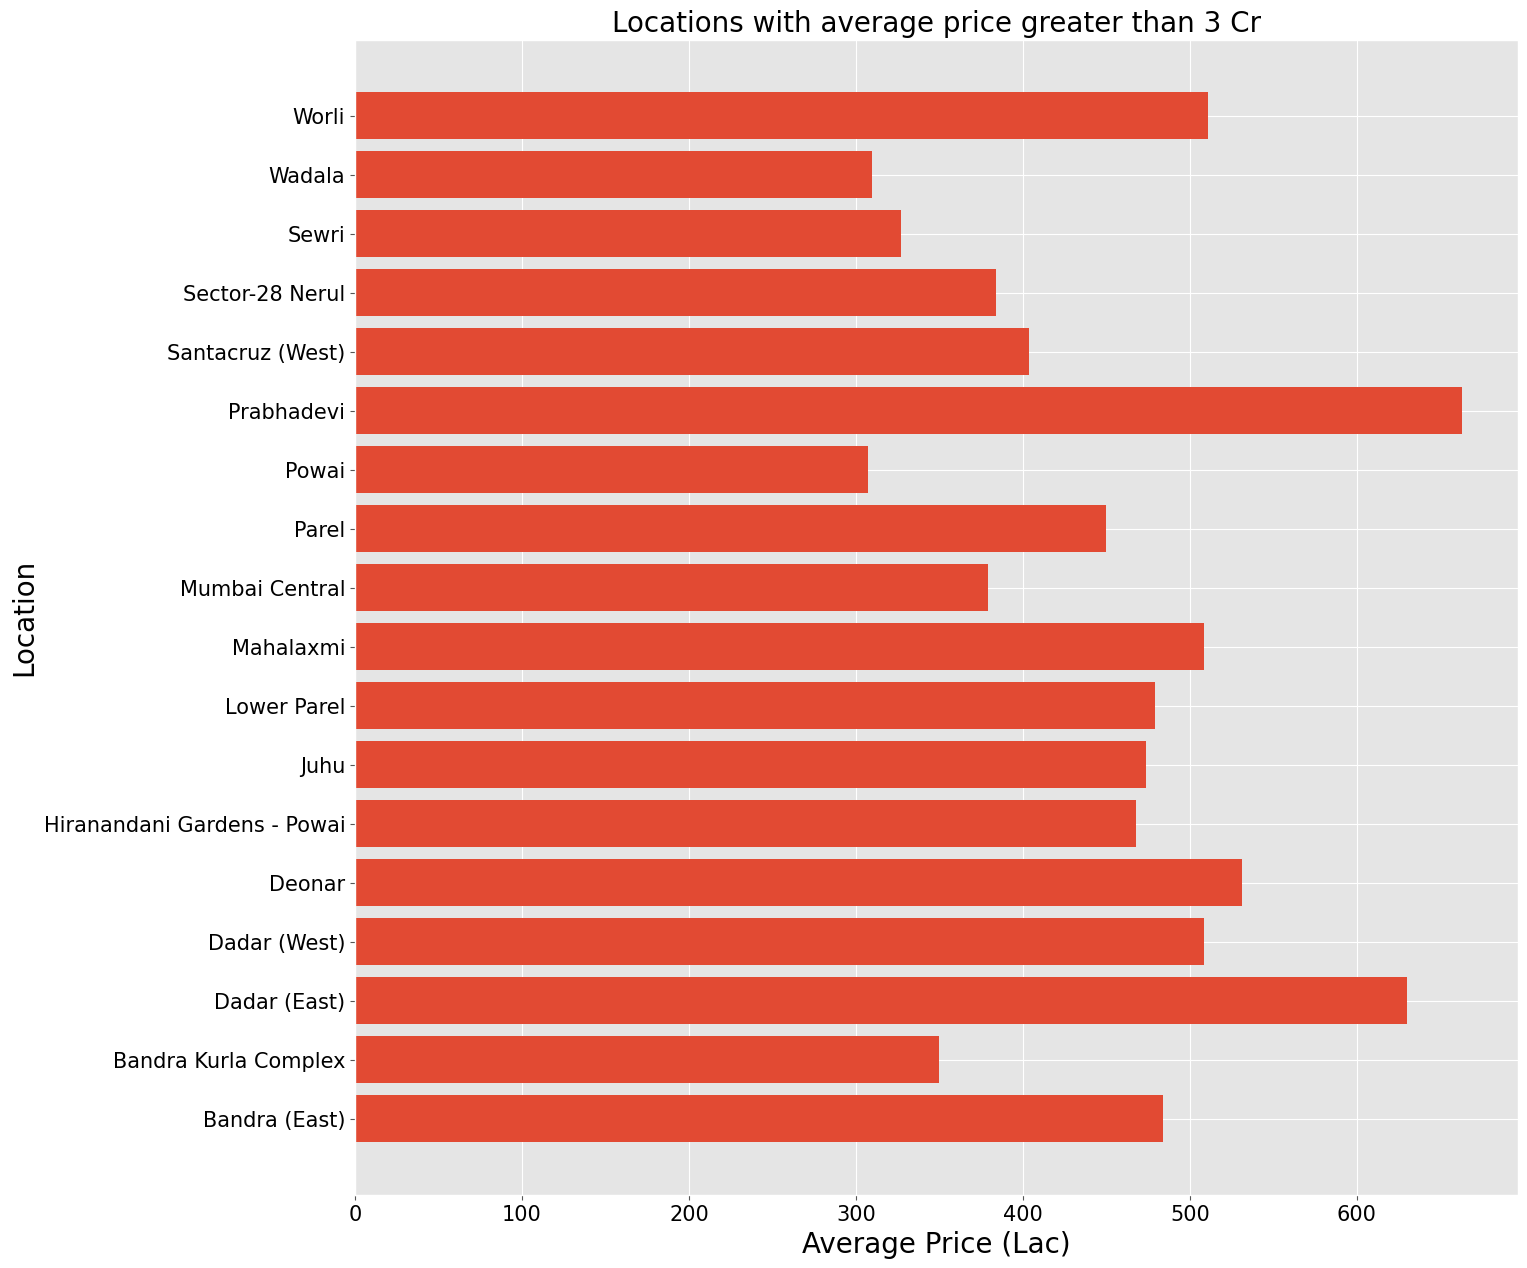

In [51]:
plt.figure(figsize=(15,15))
plt.barh(location_price_300.index,location_price_300.values)
plt.title('Locations with average price greater than 3 Cr',color = 'black', fontsize=20)
plt.xticks(color = 'black', fontsize=15)
plt.yticks(color = 'black', fontsize=15)
plt.xlabel('Average Price (Lac)',color = 'black', fontsize=20)
plt.ylabel('Location',color = 'black', fontsize=20)
plt.show()

## Bar chart of Status representing price

In [52]:
status_price = df6.groupby('Status').mean()['Price (Lac)']

<ipython-input-52-79caf5379f08>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  status_price = df6.groupby('Status').mean()['Price (Lac)']


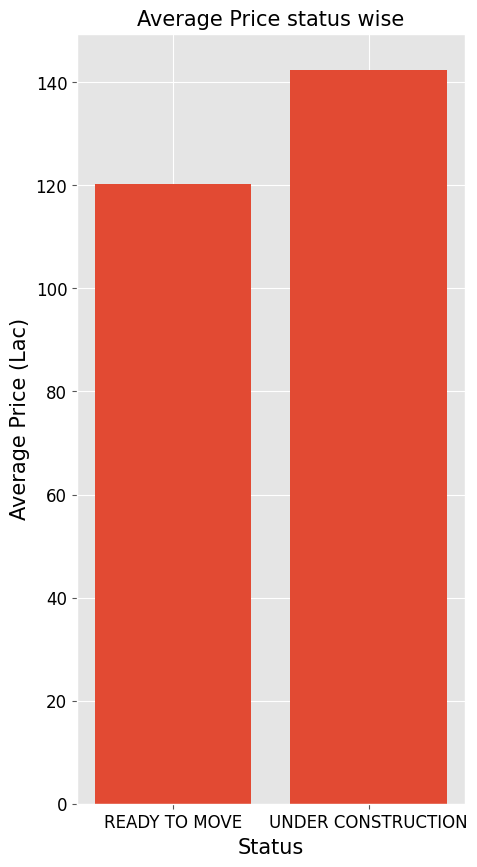

In [53]:
plt.figure(figsize=(5,10))
plt.bar(status_price.index,status_price.values)
plt.title('Average Price status wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Status',color = 'black', fontsize=15)
plt.ylabel('Average Price (Lac)',color = 'black', fontsize=15)
plt.show()

## Heat map of corelation matrix

<ipython-input-54-6b10d8765e45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=df6.corr(method='spearman')


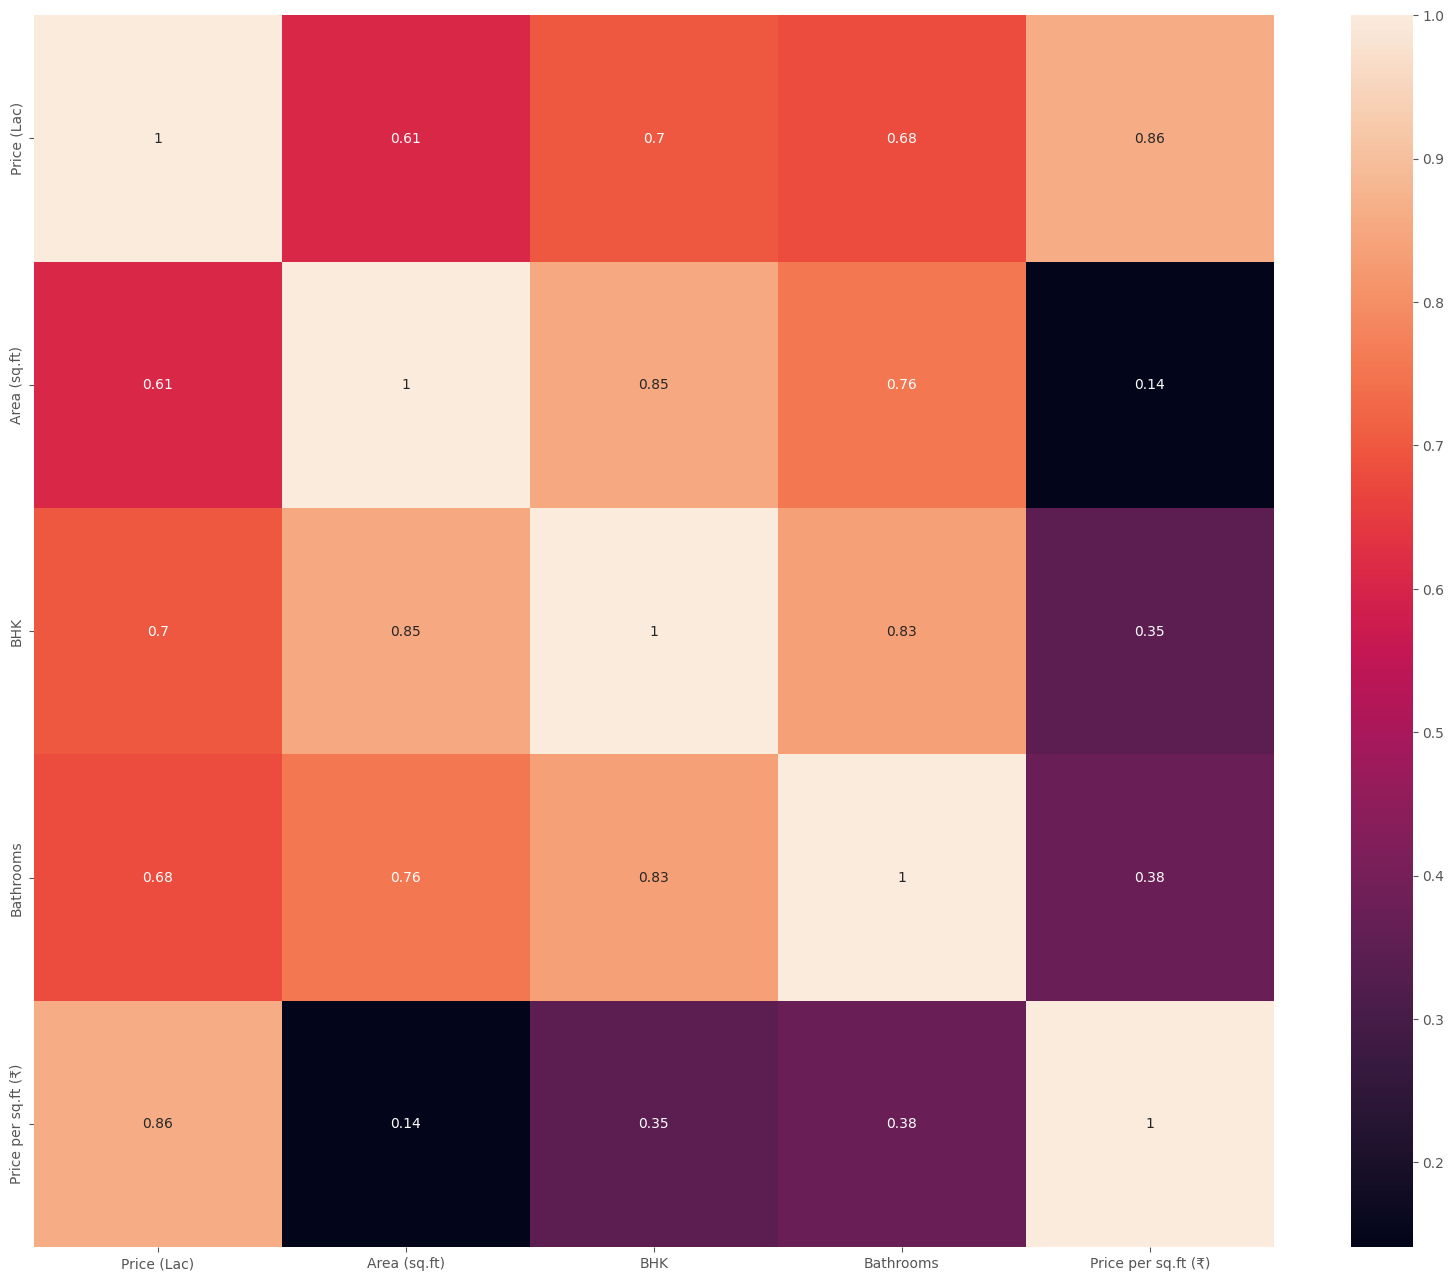

In [54]:
corrMatrix=df6.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corrMatrix,annot=True)
plt.show()

Observaions



*   BHK and Area are highly correlated
*   BHK and Bathroom are highly correlated



# Feature Engineering

## Seperating X and y

In [55]:
len(df6['Location'].unique())

215

In [56]:
X = df6.drop(['Price (Lac)', 'Price per sq.ft (₹)'], axis=1)
y = df6['Price (Lac)']

## One hot encoding of Object columns

In [57]:
# Encoding Status column
X['Status'] = X['Status'].apply(lambda x: 1 if x=='READY TO MOVE' else 0)

In [58]:
# Encoding Location column
dummies = pd.get_dummies(X['Location'])
X = pd.concat([X,dummies.drop('other', axis=1)], axis='columns')
del X['Location']

## Train-Test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Standardization

In [60]:
# Changing dimensions of dependent variable
y_train = np.array(y_train.values.tolist()).reshape(len(y_train),1)
y_test = np.array(y_test.values.tolist()).reshape(len(y_test),1)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[['Area (sq.ft)', 'BHK', 'Bathrooms']] = sc_X.fit_transform(X_train[['Area (sq.ft)', 'BHK', 'Bathrooms']])
X_test[['Area (sq.ft)', 'BHK', 'Bathrooms']] = sc_X.transform(X_test[['Area (sq.ft)', 'BHK', 'Bathrooms']])
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# Selecting Regression Model

## LASSO

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

print('Training LASSO regression using GridSearchCV')

scoring='r2' # Criterian for hyperparameter selection is R squared


model = linear_model.Lasso()

hyperparameters = {'alpha':(1,0.05,0.001,0.)}

clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(y_train))

print('Best parameters:')
print(clf.best_params_)
print('Best Rsquared score: '+ str(clf.best_score_))


Training LASSO regression using GridSearchCV


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.510e+02, tolerance: 7.585e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

Best parameters:
{'alpha': 0.0}
Best Rsquared score: 0.7891959331339627


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.610e+02, tolerance: 9.589e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


## Ridge

In [63]:
from sklearn.linear_model import Ridge

print('Training Ridge regression using GridSearchCV')

scoring='r2'

model = linear_model.Ridge()

hyperparameters = {'alpha':(0,1,5,50)}

clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(y_train))

print('Best parameters:')
print(clf.best_params_)
print('Best Rsquared score: '+ str(clf.best_score_))

Training Ridge regression using GridSearchCV
Best parameters:
{'alpha': 0}
Best Rsquared score: 0.7891959331339627


## Random Forest

In [64]:
#from sklearn.ensemble import RandomForestRegressor

#print('Training Random Forest Regressor using GridSearchCV')

#scoring='r2'

#model = RandomForestRegressor(random_state=0)

#hyperparameters = {'max_depth':[65],'n_estimators':[300]}

#clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
#clf.fit(np.array(X_train), np.squeeze(y_train))

#print('Best parameters:')
#print(clf.best_params_)
#print('Best mae score: '+ str(abs(clf.best_score_)))



## SVR

In [65]:
#from sklearn.svm import SVR

#print('Training Support Vector Regression using GridSearchCV')

#scoring='r2'

#model = SVR(kernel='linear')

#hyperparameters = {'C':[0.1],'degree':[3,5,8]}

#clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
#clf.fit(np.array(X_train), np.squeeze(y_train))

#print('Best parameters:')
#print(clf.best_params_)
#print('Best mae score: '+ str(abs(clf.best_score_)))

Linear Regression is giving max R-squared

# Final Model - Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
print('R-squared of for Linear Regression is {}'.format(round(reg.score(X, y),3)))

R-squared of for Linear Regression is 0.801


In [67]:
def predictPrice(location,area,bhk,bath,status):
  try:
    loc_index = np.where(X.columns==location)[0][0]
  except:
    loc_index = 0

  x = np.zeros(len(X.columns))
  x[0] = area
  x[1] = bhk
  x[2] = bath
  x[3] = status
  if(loc_index>0):
    x[loc_index] = 1
  return reg.predict([x])

In [68]:
predictPrice('Pokhran-2',1268,3,3,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([261.677019])